In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes=True)
import scipy.linalg as la





# **loading data**

In [ ]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
dataset=pd.read_csv(url,header=None)

In [ ]:
X = dataset.iloc[:, 2:32].values
Y = dataset.iloc[:, 1].values



In [ ]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (569, 32)


# **viewing data**

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **labeling data**

In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
# print(Y)


# **data visualizing**

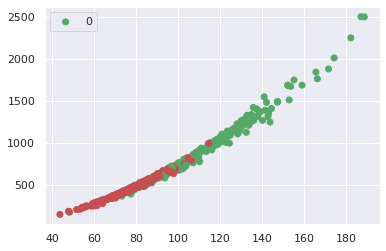

In [ ]:
colormap=np.array(['r','g'])
plt.figure(1)

plt.scatter(X[:,2],X[:, 3],c=colormap[Y])
labels=np.unique(Y)
plt.legend(labels)

plt.show()

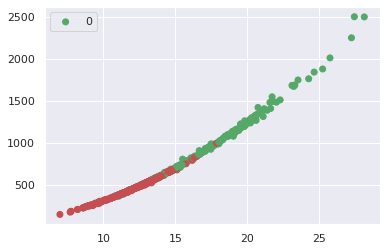

In [ ]:
plt.scatter(X[:,0],X[:,3],c=colormap[Y])
labels=np.unique(Y)
plt.legend(labels)

plt.show()

# principal component analysis(PCA) 

# **feature means**

In [ ]:
mean_vectors=list()
for i in range(30):
  means=X[:,i].mean()
  mean_vectors.append(means)

# **#definning covarince**

In [ ]:
#definning covarince
def covar(x1,x2,m1,m2):
    l=len(x1)
    sum=0
    for i in range(l):
        sum=sum+((x1[i]-m1)*(x2[i]-m2))
    return sum/float(l-1)

# **finding covariance matrix**

In [ ]:
#finding covariance matrix
co_mat =np.zeros((30,30), dtype=np.float64)
for i in range(30):
    for j in range(30):
        co_mat[i][j]=covar(X[0:][i],X[0:][j],mean_vectors[i],mean_vectors[j])
# print(co_mat)

**#finding eigen value and eigen vectors**

In [ ]:
#finding eigen value and eigen vectors
eigen_val=la.eig(co_mat)[0]
eigen_vectors=la.eig(co_mat)[1]
# print(eigen_vectors)
#print(eigen_val)

In [ ]:
v=eigen_vectors[:,0:3]


**#new feature space**

In [ ]:

y=np.dot(X-mean_vectors,v)
# print(y.shape)

**data visualization after pca**

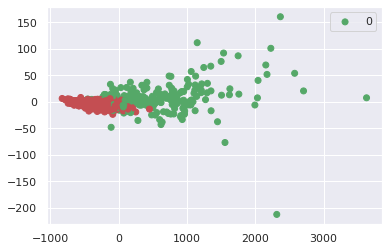

In [ ]:
plt.scatter(y[:,1],y[:,2],c=colormap[Y])
labels=np.unique(Y)
plt.legend(labels)

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(y, Y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)

# **accuracy**

In [ ]:
def accuracy(x,y):
    acc=np.sum(x==y)/len(x)
    return acc

In [ ]:
print(accuracy(pred,Y_test))

0.9370629370629371


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
accuracy_list=list()
for i in range(1,31):
  v=eigen_vectors[:,0:i]
  y=np.dot(X-mean_vectors,v)
  X_train, X_test, Y_train, Y_test = train_test_split(y, Y, test_size = 0.25, random_state = 0)
  classifier = GaussianNB()
  classifier.fit(X_train,Y_train)
  pred=classifier.predict(X_test)
  acc=accuracy(pred,Y_test) 
  accuracy_list.append(acc)
# print(accuracy_list)

<function matplotlib.pyplot.show>

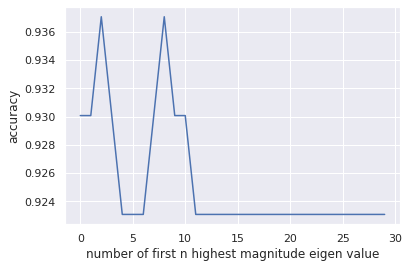

In [ ]:
n = np.arange(30)
plt.plot(n,accuracy_list)
plt.xlabel("number of first n highest magnitude eigen value")
plt.ylabel("accuracy")
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegression

accuracy_list=list()
for i in range(1,31):
  v=eigen_vectors[:,0:i]
  y=np.dot(X-mean_vectors,v)
  X_train, X_test, Y_train, Y_test = train_test_split(y, Y, test_size = 0.25, random_state = 0)
  classifier = LogisticRegression(random_state = 0)
  classifier.fit(X_train,Y_train)
  pred=classifier.predict(X_test)
  acc=accuracy(pred,Y_test) 
  accuracy_list.append(acc)


<function matplotlib.pyplot.show>

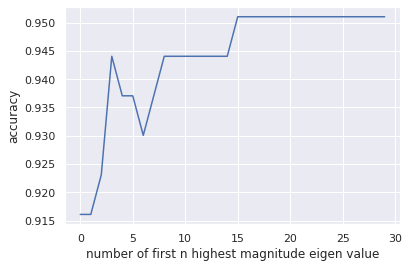

In [ ]:
n = np.arange(30)
plt.plot(n,accuracy_list)
plt.xlabel("number of first n highest magnitude eigen value")
plt.ylabel("accuracy")
plt.show

In [ ]:
from sklearn.svm import SVC

accuracy_list=list()
for i in range(1,31):
  v=eigen_vectors[:,0:i]
  y=np.dot(X-mean_vectors,v)
  X_train, X_test, Y_train, Y_test = train_test_split(y, Y, test_size = 0.25, random_state = 0)
  classifier = SVC(kernel = 'linear', random_state = 0)
  classifier.fit(X_train,Y_train)
  pred=classifier.predict(X_test)
  acc=accuracy(pred,Y_test) 
  accuracy_list.append(acc)
# print(accuracy_list)


<function matplotlib.pyplot.show>

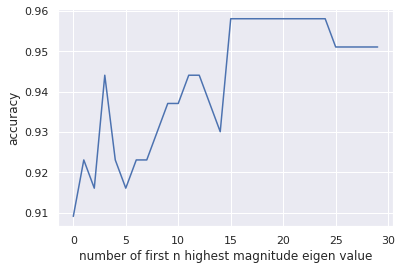

In [ ]:
n = np.arange(30)
plt.plot(n,accuracy_list)
plt.xlabel("number of first n highest magnitude eigen value")
plt.ylabel("accuracy")
plt.show

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

accuracy_list=list()
for i in range(1,31):
  v=eigen_vectors[:,0:i]
  y=np.dot(X-mean_vectors,v)
  X_train, X_test, Y_train, Y_test = train_test_split(y, Y, test_size = 0.25, random_state = 0)
  classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  classifier.fit(X_train,Y_train)
  pred=classifier.predict(X_test)
  acc=accuracy(pred,Y_test) 
  accuracy_list.append(acc)
# print(accuracy_list)

<function matplotlib.pyplot.show>

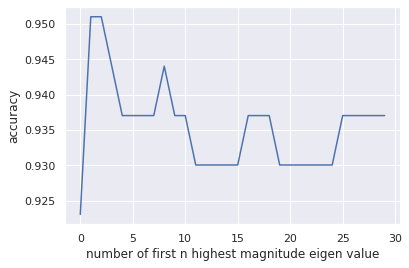

In [ ]:
n = np.arange(30)
plt.plot(n,accuracy_list)
plt.xlabel("number of first n highest magnitude eigen value")
plt.ylabel("accuracy")
plt.show

# **linear discriminant analysis**

**separating class**

In [ ]:
X1 = dataset.iloc[:, 1:32].values
W1=list()
W2=list()
for i in range(len(X1[:,0])):
  if X1[:,0][i]=='M':
    W1.append(X1[i,1:])
    
  else:
    W2.append(X1[i,1:])
W1=np.array(W1) 
W2=np.array(W2)  


**means of each class**

In [ ]:
mu1=list()
mu2=list()
for i in range(30):
  means=W1[:,i].mean()
  mu1.append(means)
for i in range(30):
  means=W2[:,i].mean()
  mu2.append(means)


**covarience matrix of class 1**

In [ ]:
S1 =np.zeros((30,30), dtype=np.float64)
for i in range(30):
    for j in range(30):
        S1[i][j]=covar(W1[0:][i],W2[0:][j],mu1[i],mu1[j])

**covarience matrix of class 2**

In [ ]:
S2=np.zeros((30,30), dtype=np.float64)
for i in range(30):
    for j in range(30):
        S2[i][j]=covar(W2[0:][i],W2[0:][j],mu2[i],mu2[j])

In [ ]:
mu1=np.array([mu1])
mu2=np.array([mu2])
m=mu1-mu2

m1=m.transpose()
# print(m.shape)
# print(m1.shape)


**within class scatter and between class scatter matrix**

In [ ]:
Sw=S1+S2
Sb=np.dot(m1,m)
Sw_inv=np.linalg.inv(Sw)
Sw_inv_Sb=np.dot(Sw_inv,Sb)

**eigen value and eigen vector**

In [ ]:
eigen_val=la.eig(Sw_inv_Sb)[0]
eigen_vectors=la.eig(Sw_inv_Sb)[1]



sorting eigen value and corresponding eigen vectors

In [ ]:
pairs = [(np.abs(eigen_val[i]), eigen_vectors[:,i]) for i in range(len(eigen_val))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

pairs=np.array(pairs)


[ 0.36275654+0.j -0.13747024+0.j -0.25506876+0.j -0.00170901+0.j
  0.39847716+0.j -0.03923164+0.j -0.06997355+0.j  0.26582099+0.j
  0.19152753+0.j -0.20894231+0.j -0.1097654 +0.j -0.11597358+0.j
 -0.05614364+0.j  0.17952775+0.j  0.00354803+0.j -0.09922312+0.j
 -0.16589404+0.j -0.24661483+0.j  0.03220861+0.j -0.05031128+0.j
  0.02247976+0.j  0.34339745+0.j  0.16140459+0.j -0.01273225+0.j
  0.04168185+0.j  0.02206939+0.j -0.2749177 +0.j  0.12607622+0.j
 -0.25755303+0.j -0.03010401+0.j]


taking first n eigen vectors and creating transform matrix

In [ ]:

for i in range(1,8):
  w_=list()
  for j in range(i):
    w=np.hstack((pairs[j-1][1].reshape(30,1))).real
    w_.append(w)
    w_1=np.array(w_).transpose()
    X_lda = np.array(X.dot(w_1))
  



finding accuracy for logistic regression

In [ ]:

from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X_lda, Y, test_size = 0.25, random_state = 0)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
acc=accuracy(pred,Y_test) 
print(acc)

0.6293706293706294


accuracy for Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
acc=accuracy(pred,Y_test)
print(acc)

0.7062937062937062


using SVM

In [ ]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
acc=accuracy(pred,Y_test) 

print(acc)

0.6293706293706294


using KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train,Y_train)
pred=classifier.predict(X_test)
acc=accuracy(pred,Y_test) 
print(acc)

0.7202797202797203


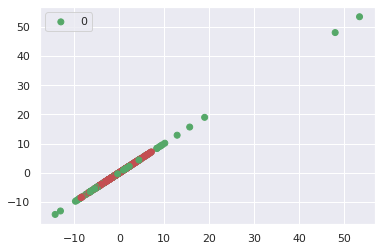

In [ ]:
plt.scatter(X_lda[:,1],X_lda[:,2],c=colormap[Y])
labels=np.unique(Y)
plt.legend(labels)

plt.show()